# Visualizing the training accuracy

In [1]:
# load the log file
import sys
import os

def load_log_file(file_path):
    if not os.path.exists(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return None

    try:
        with open(file_path, 'r') as file:
            log_data = file.readlines()
        return log_data
    except Exception as e:
        print(f"Error reading the file {file_path}: {e}")
        return None

log = load_log_file("gpt-gemma.out")

In [7]:
import re
from typing import List, Tuple
import matplotlib.pyplot as plt

def extract_accuracy_for_iterations(log_content: str) -> List[float]:
    """
    Extracts the mean accuracy for each iteration from a log file's content.

    Args:
        log_content: A string containing the full log file content.

    Returns:
        A list of float values, where each float represents the mean accuracy
        of an iteration. The order of accuracies in the list corresponds to
        the order of iterations in the log.
    """
    # Regex to find lines like "Iteration X: mean accuracy of top 10: Y."
    # It captures the floating-point number after "mean accuracy of top 10: "
    accuracy_pattern = r"Iteration \d+: mean accuracy of top 10: (\d+\.\d+)\."

    # Find all matches of the pattern in the log content
    matches = re.findall(accuracy_pattern, log_content)

    # Convert the extracted string accuracies to float
    accuracies = [float(acc) for acc in matches]

    return accuracies

def plot_accuracy_over_iterations(accuracies: List[float]):
    """
    Plots the mean accuracy values over iterations.

    Args:
        accuracies: A list of float values representing the accuracy for each iteration.
    """
    if not accuracies:
        print("No accuracy data to plot.")
        return

    iterations = range(1, len(accuracies) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, accuracies, marker='o', linestyle='-', color='skyblue')
    plt.title('Mean Accuracy (Top 10) Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.xticks(range(0, len(accuracies), 250)) # Ensure all iteration numbers are shown on x-axis
    plt.ylim(min(accuracies) * 0.95, max(accuracies) * 1.05) # Add some padding to y-axis
    plt.show()


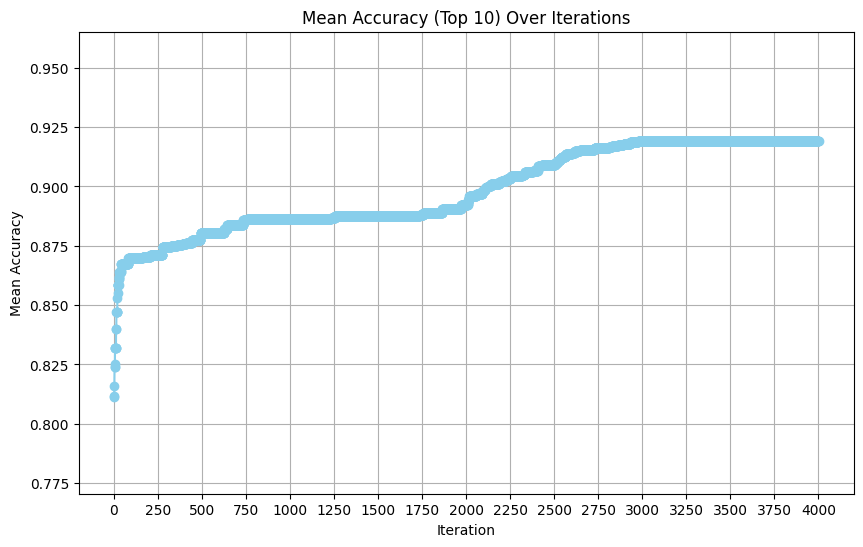

In [8]:
# accuracy = extract_accuracy_for_iterations(''.join(log))
if accuracy:
    plot_accuracy_over_iterations(accuracy)